# 2 折线图、柱状图、散点图
Matplotlib 可以绘制绝大多数的图表，包括折线图、柱状图、散点图等。这些图表的绘制方法都是类似的，只是参数设置有所不同。下面我们分别介绍这三种图表的绘制方法。

## 2.1 折线图
折线图是一种常见的图表类型，用于反应两个变量之间的关系。

### 2.1.1 简单折线图

下面我们通过一个例子来介绍如何绘制折线图。

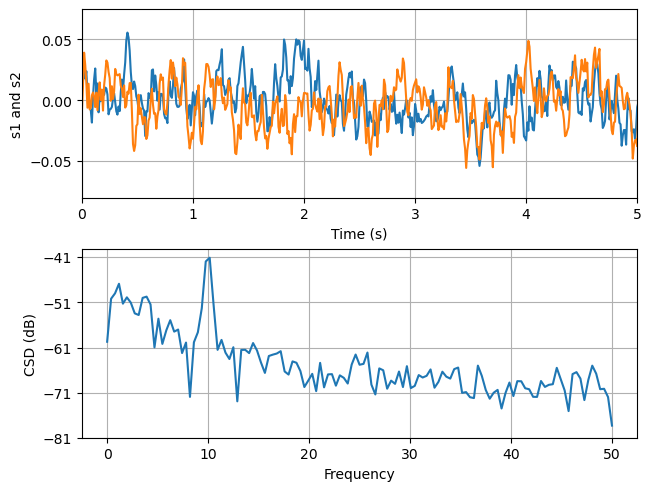

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个包含两个子图的图形对象，布局为约束布局
fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')

dt = 0.01  # 时间步长为0.01秒
t = np.arange(0, 30, dt)  # 生成从0到30秒的时间数组，步长为0.01秒

# 固定随机数种子以确保可重复性
np.random.seed(19680801)

nse1 = np.random.randn(len(t))  # 生成与时间数组长度相同的白噪声1
nse2 = np.random.randn(len(t))  # 生成与时间数组长度相同的白噪声2
r = np.exp(-t / 0.05)  # 生成指数衰减函数

# 通过卷积生成有色噪声1，并乘以时间步长
cnse1 = np.convolve(nse1, r, mode='same') * dt
# 通过卷积生成有色噪声2，并乘以时间步长
cnse2 = np.convolve(nse2, r, mode='same') * dt

# 生成包含相干部分和随机部分的两个信号
s1 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse1
s2 = 0.01 * np.sin(2 * np.pi * 10 * t) + cnse2

# 在第一个子图上绘制两个信号的时间序列
ax1.plot(t, s1, t, s2)
ax1.set_xlim(0, 5)  # 设置x轴范围为0到5秒
ax1.set_xlabel('Time (s)')  # 设置x轴标签为“Time (s)”
ax1.set_ylabel('s1 and s2')  # 设置y轴标签为“s1 and s2”
ax1.grid(True)  # 启用网格

# 在第二个子图上计算并绘制两个信号的互功率谱密度
cxy, f = ax2.csd(s1, s2, 256, 1. / dt)
ax2.set_ylabel('CSD (dB)')  # 设置y轴标签为“CSD (dB)”

plt.show()  # 显示图形

上述代码中，我们首先使用 `fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')` 创建了一个画布。 
- `subplots()` 方法的第一个参数是行数，第二个参数是列数，第三个参数是布局方式。这里我们创建了一个 2 行 1 列的画布。
- `subplots()` 方法返回一个元组，第一个元素是画布对象，第二个元素是一个包含两个子图对象的列表。我们通过解包的方式将这两个子图对象赋值给了 `ax1` 和 `ax2` 两个变量。

然后通过 `ax1.plot(t, s1, t, s2)` 方法绘制了一个折线图。
- `ax1.plot()` 代表在 `ax1` 子图上绘制折线图。
- `plot()` 方法的第一个参数是 x 轴的数据，第二个参数是 y 轴的数据。这里我们传入了两组 x 轴和 y 轴的数据，所以绘制了两条折线。
- `plot()` 方法还可以接收一些参数，用于设置折线的样式。这里我们没有传入这些参数，所以折线的样式是默认的。

接着通过 `ax1.set_xlim(0, 5)` 方法设置了子图 `ax1` 的 x 轴范围， 同理也可以使用 `ax1.set_ylim()` 方法设置 y 轴的范围。
- `set_xlim()` 方法的第一个参数是 x 轴的最小值，第二个参数是 x 轴的最大值。

此外，还可以通过 `xlabel()` 和 `ylabel()` 方法设置 x 轴和 y 轴的标签，通过 `title()` 方法设置图表的标题。

`ax2.csd(s1, s2, 256, 1 / dt)` 这句代码在子图 `ax2` 上绘制了一个频谱图。
- `csd()` 方法的第一个参数是第一个信号的数据，第二个参数是第二个信号的数据，第三个参数是 FFT 的点数，第四个参数是采样周期。

最后通过 `show()` 方法显示图表。


### 2.1.1 线形和Markevery

折线图的线形可以通过 `plot()` 方法的 `linestyle` 参数设置。简单的线型可以使用字符串 "solid"（实线）、"dotted"（点线）、"dashed"（虚线）或 "dashdot"（点划线）来定义。也可以通过提供一个 dash 元组 (offset, (on_off_seq)) 可以实现更精细的控制。例如，(0, (3, 10, 1, 15)) 表示 (3pt 线段, 10pt 空格, 1pt 线段, 15pt 空格)，没有偏移；而 (5, (10, 3)) 表示 (10pt 线段, 3pt 空格)，但跳过第一个 5pt 线段。


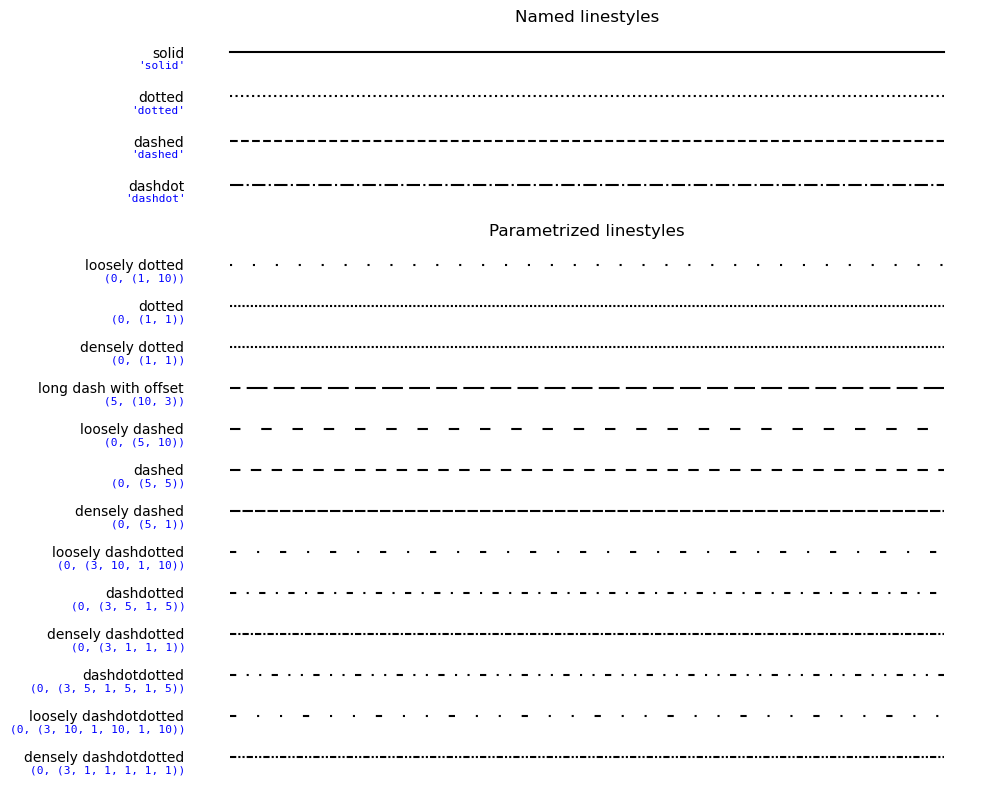

In [35]:
import matplotlib.pyplot as plt
import numpy as np

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5),
           yticks=np.arange(len(linestyles)),
           yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
                    xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")


fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 8), height_ratios=[1, 3])

plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

plt.tight_layout()
plt.show()

`Line2D` 的 `markevery` 属性允许在数据点的子集上绘制标记。`markevery` 参数的值可以是一个整数，也可以是一个元组。如果是整数，表示每隔多少个点绘制一个标记；如果是元组，表示从第几个点开始绘制标记，以及每隔多少个点绘制一个标记。

简而言之，`markevery` 参数的值可以是以下几种类型：

- 单个整数 N 表示每 N 个标记绘制一个。
- 整数元组 (start, N) 表示从数据索引 start 开始，每 N 个标记绘制一个。
- 整数列表表示在指定的索引处绘制标记。
- 切片表示在切片的索引处绘制标记。
- 浮点数指定标记之间的距离，作为屏幕空间中坐标轴对角线的分数。这将导致沿线的点在视觉上均匀分布，无论比例和缩放如何。



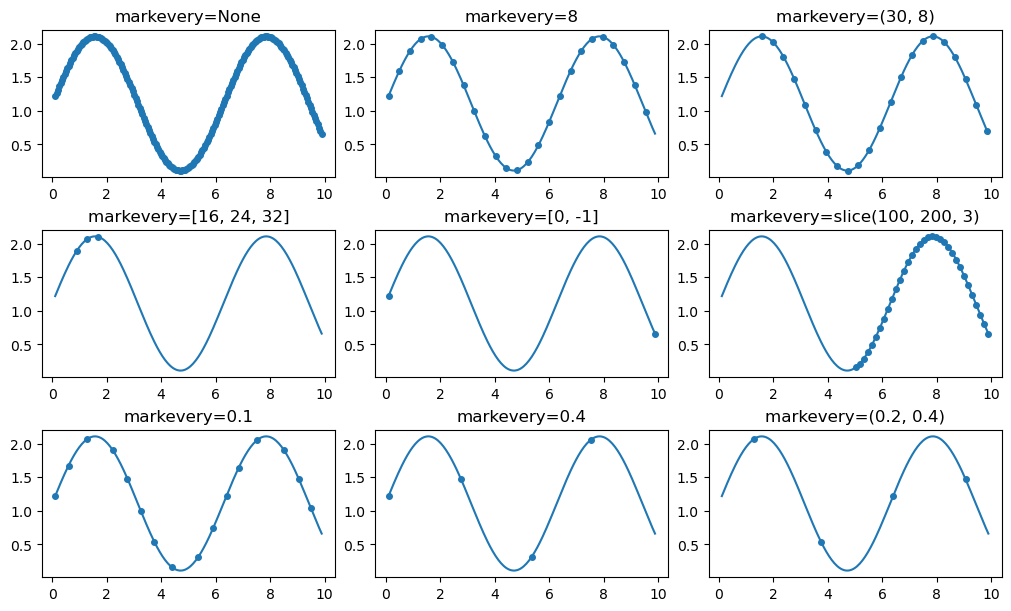

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta

fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)

### 2.1.2 带误差棒的折线图

有时候我们需要在折线图上显示误差棒，以反映数据的不确定性。下面我们通过一个例子来介绍如何绘制带误差棒的折线图。

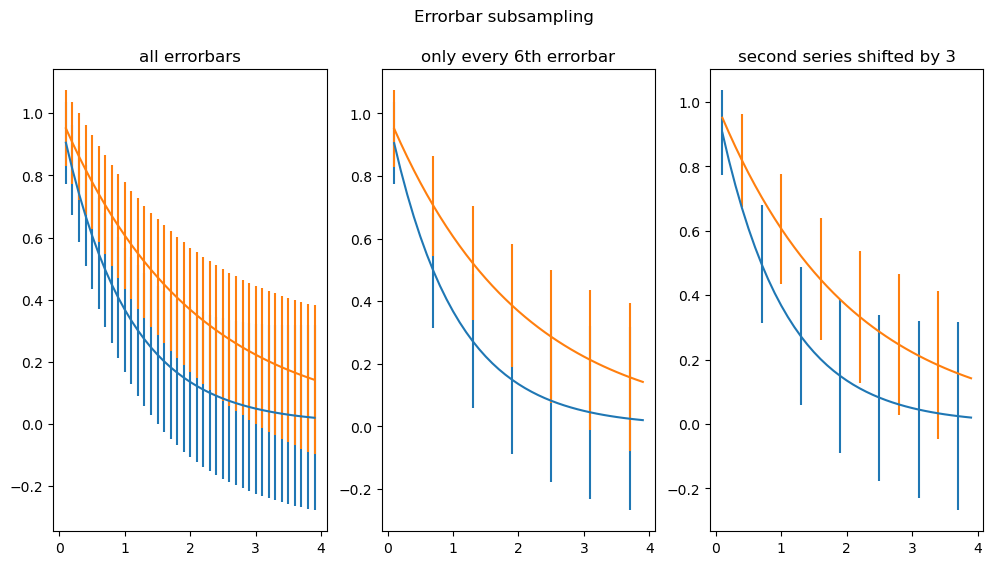

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example variable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')
plt.show()

`errorbar()` 方法的第一个参数是 x 轴的数据，第二个参数是 y 轴的数据，第三个参数 `yerr` 是 y 轴的误差数据，此外还可以传入 `xerr` 参数，用于设置 x 轴的误差数据。

上述代码主要通过不同的 `errorevery` 参数值来设置误差棒的密度。
- default: `errorevery=1` 表示每个数据点都显示误差棒。
- `errorevery=6` 表示每隔 6 个数据点显示一个误差棒。
- `errorevery` 参数的值越大，误差棒的密度越小。
- `errorevery=(0, 6)` 表示从第一个数据点开始，每隔 6 个数据点显示一个误差棒。 `errorevery=(3, 6)` 表示从第 4 个数据点（索引为 3）开始，每隔 6 个数据点显示一个误差棒。


有时我们需要在误差棒上使用箭头表示误差的**上下限**，可以通过 `uplims` 和 `lolims` 参数来设置。

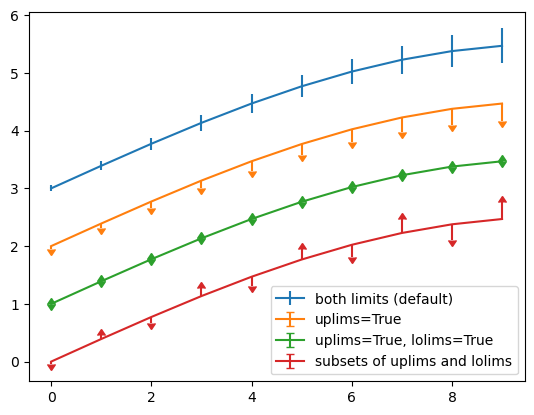

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)  # 生成一个包含 0 到 9 的数组
y = 2.5 * np.sin(x / 20 * np.pi)  # 计算 y 值，使用正弦函数
yerr = np.linspace(0.05, 0.3, 10)  # 生成一个包含 0.05 到 0.2 的数组，作为 y 误差

fig = plt.figure()  # 创建一个新的图形对象

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')  # 绘制带有误差棒的折线图，标签为 'both limits (default)'

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')  # 绘制带有上限误差棒的折线图，标签为 'uplims=True'

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,  # 绘制带有上下限误差棒的折线图，标签为 'uplims=True, lolims=True'
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5  # 定义上限误差棒的布尔数组
lowerlimits = [False, True] * 5  # 定义下限误差棒的布尔数组
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,  # 绘制带有子集上下限误差棒的折线图
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')  # 显示图例，位置在右下角

上述代码首先生成 `x` 和 `y` 两组数据，并且生成了 `yerr` 误差数据。

然后通过 `errorbar()` 方法绘制带误差棒的折线图。
- `errorbar()` 方法的第一个参数是 x 轴的数据，第二个参数是 y 轴的数据，第三个参数 `yerr` 是 y 轴的误差数据，此外还可以传入 `xerr` 参数，用于设置 x 轴的误差数据。
- `errorbar()` 方法还可以接收一些参数，用于设置误差棒的样式。这里我们没有传入这些参数，所以误差棒的样式是默认的。
- `errorbar()` 方法可以接受 `lolims`, `uplims`, `xlolims`, `xuplims` 参数，用于设置误差棒的方向，分别代表 y 轴下限、上限、x 轴下限、上限。当这些参数为 True 时，表示不显示对应方向的误差棒。

对于第一条蓝色的误差折线图，没有进行额外的参数设置，所以误差棒的样式是默认的。

对于第二条黄色的误差折线图，我们设置了 `uplims=True` 参数，所以屏蔽上限的误差棒，只显示下限的误差棒。

对于第三条绿色的误差折线图，我们设置了 `uplims=True, lolims=True` 参数，表示既不显示下限，也不显示上限。

对于第四条红色的误差折线图，使用数组进行了误差棒的设置，`uplims` 和 `lolims` 分别接收两个数组，交叉显示上限和下限的误差棒。


下面是 显示 `x` 轴误差棒的代码：

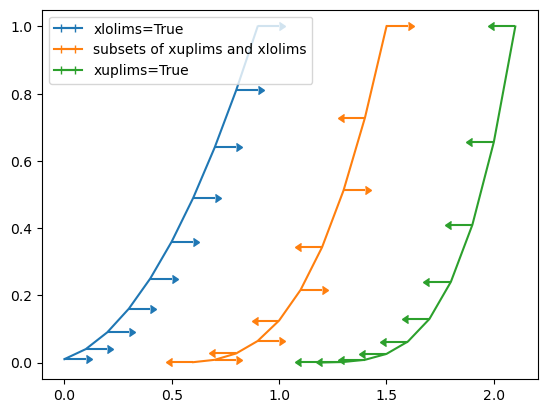

In [34]:
fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

plt.errorbar(x + 0.6, y, xerr=0.1, xuplims=upperlimits, xlolims=lowerlimits,
             label='subsets of xuplims and xlolims')

y = (x + 0.1)**4
plt.errorbar(x + 1.2, y, xerr=0.1, xuplims=True, label='xuplims=True')

plt.legend()
plt.show()

### 2.1.3 区间填充和透明度

`fill_between` 是 Matplotlib 中的一个常用方法，用于在两个曲线之间填充区域。这种方式可以帮助我们更好地展示数据范围或不确定性区域等。我们可以通过调整透明度 (`alpha`) 来改变填充区域的显示效果。
- `x` 参数是 x 轴的数据，`y1` 和 `y2` 分别是两条曲线的 y 轴数据。
- `where` 参数用于设置填充区域的条件，当 `where` 参数为 True 时，填充区域才会显示。默认情况下，填充区域是两条曲线之间的区域。
- `interpolate` 参数用于设置填充区域的插值方式，可以设置为 `True` 或 `False`。当 `interpolate=True` 时，填充区域会进行插值，使得填充区域更加平滑。
- `alpha` 参数用于设置填充区域的透明度，取值范围是 0 到 1，0 表示完全透明，1 表示完全不透明。

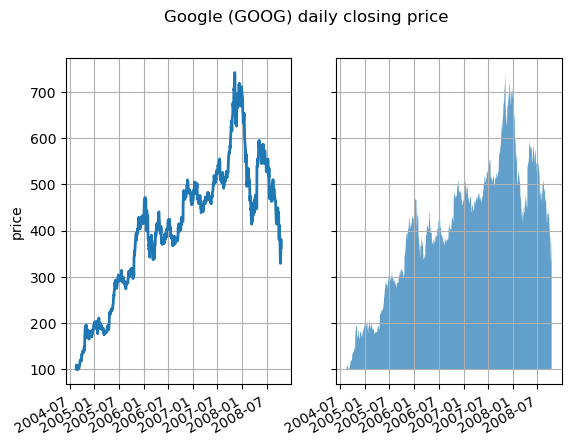

In [41]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# 加载一些示例金融数据
r = cbook.get_sample_data('goog.npz')['price_data']
# 创建两个共享 x 轴和 y 轴的子图
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

pricemin = r["close"].min()  # 获取收盘价的最小值

ax1.plot(r["date"], r["close"], lw=2)  # 在第一个子图上绘制折线图
ax2.fill_between(x=r["date"], y1=pricemin, y2=r["close"], alpha=0.7)  # 在第二个子图上绘制填充图

for ax in ax1, ax2:  # 对两个子图进行设置
    ax.grid(True)  # 启用网格
    ax.label_outer()  # 只显示外部标签

ax1.set_ylabel('price')  # 设置第一个子图的 y 轴标签为 'price'

fig.suptitle('Google (GOOG) daily closing price')  # 设置图表的总标题
fig.autofmt_xdate()  # 自动调整 x 轴日期标签的格式

下面这段代码的功能是模拟两组随机游走者的运动，并绘制它们的平均位置及标准差的变化曲线，最后用 `fill_between` 填充两组随机游走者位置随时间变化的均值曲线与其标准差之间的区域。

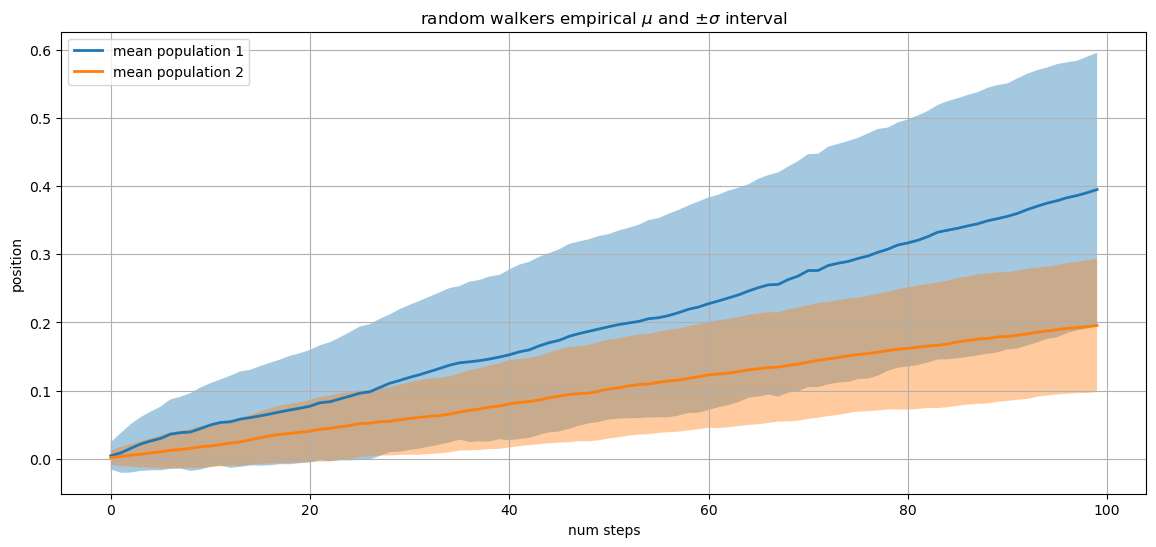

In [4]:
# 固定随机状态以确保结果可重复
np.random.seed(19680801)

Nsteps, Nwalkers = 100, 250
t = np.arange(Nsteps)

# 一个 (Nsteps x Nwalkers) 的随机游走步数数组
S1 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)
S2 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)

# 一个 (Nsteps x Nwalkers) 的随机游走者位置数组
X1 = S1.cumsum(axis=0)
X2 = S2.cumsum(axis=0)

# Nsteps 长度的数组，表示两个群体随时间变化的经验均值和标准差
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
mu2 = X2.mean(axis=1)
sigma2 = X2.std(axis=1)

# 绘制图形！
fig, ax = plt.subplots(1,figsize=(14, 6))
ax.plot(t, mu1, lw=2, label='mean population 1')
ax.plot(t, mu2, lw=2, label='mean population 2')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='C0', alpha=0.4)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C1', alpha=0.4)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
ax.grid()

我们还可以通过控制 `where` 参数来设置填充区域的条件。例如，`where=(y1 > y2)` 表示只有当第一条曲线的 y 值大于第二条曲线的 y 值时，才填充区域。

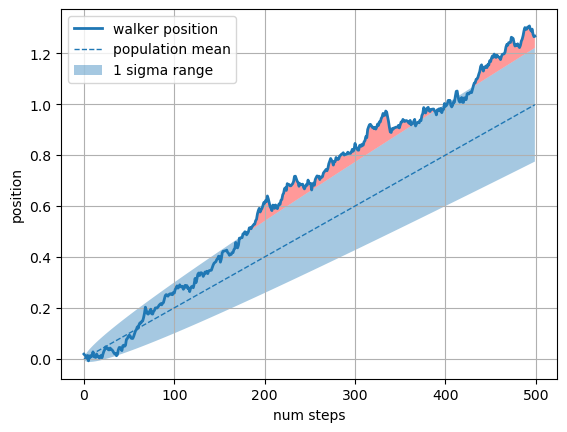

In [56]:
# 固定随机状态以确保结果可重复
np.random.seed(1)

# 定义步数
Nsteps = 500
# 创建一个从0到Nsteps-1的数组，表示时间步
t = np.arange(Nsteps)

# 定义均值和标准差
mu = 0.002
sigma = 0.01

# 生成步长和位置
# 生成一个正态分布的随机数数组，均值为mu，标准差为sigma
S = mu + sigma * np.random.randn(Nsteps)
# 计算步长的累积和，得到位置
X = S.cumsum()

# 计算1 sigma的上下界
# 计算下界：均值减去标准差乘以时间步的平方根
lower_bound = mu * t - sigma * np.sqrt(t)
# 计算上界：均值加上标准差乘以时间步的平方根
upper_bound = mu * t + sigma * np.sqrt(t)

# 创建一个图形和一个子图
fig, ax = plt.subplots(1)
# 绘制步行者位置的折线图
ax.plot(t, X, lw=2, label='walker position')
# 绘制人口均值的折线图
ax.plot(t, mu * t, lw=1, label='population mean', color='C0', ls='--')
# 填充1 sigma范围内的区域
ax.fill_between(t, lower_bound, upper_bound, facecolor='C0', alpha=0.4, label='1 sigma range')
# 添加图例，位置在左上角
ax.legend(loc='upper left')

# 使用where参数仅填充步行者位置超过1 sigma边界的区域
# 填充步行者位置超过上界的区域，颜色为红色，透明度为0.4
ax.fill_between(t, upper_bound, X, where=X > upper_bound, fc='red', alpha=0.4)
# 填充步行者位置低于下界的区域，颜色为红色，透明度为0.4
ax.fill_between(t, lower_bound, X, where=X < lower_bound, fc='red', alpha=0.4)
# 设置x轴标签为“步数”
ax.set_xlabel('num steps')
# 设置y轴标签为“位置”
ax.set_ylabel('position')
# 显示网格
ax.grid()

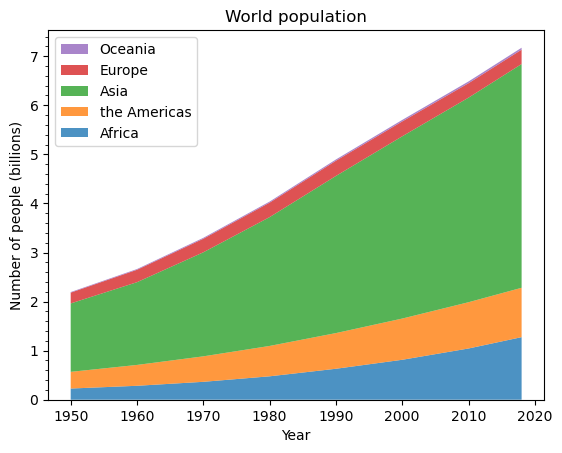

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker

# 联合国世界人口展望（2019年修订版）的数据
# https://population.un.org/wpp/, 许可证: CC BY 3.0 IGO
# 定义年份列表
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
# 定义各大洲的人口数据（单位：十亿）
population_by_continent = {
    'Africa': [.228, .284, .365, .477, .631, .814, 1.044, 1.275],
    'the Americas': [.340, .425, .519, .619, .727, .840, .943, 1.006],
    'Asia': [1.394, 1.686, 2.120, 2.625, 3.202, 3.714, 4.169, 4.560],
    'Europe': [.220, .253, .276, .295, .310, .303, .294, .293],
    'Oceania': [.012, .015, .019, .022, .026, .031, .036, .039],
}

# 创建一个图形和一个子图
fig, ax = plt.subplots()
# 绘制堆叠面积图
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
# 添加图例，位置在左上角，顺序反转
ax.legend(loc='upper left', reverse=True)
# 设置图表标题
ax.set_title('World population')
# 设置x轴标签为“Year”
ax.set_xlabel('Year')
# 设置y轴标签为“Number of people (billions)”
ax.set_ylabel('Number of people (billions)')
# 添加每2亿人一个刻度的次刻度
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.2))

# 显示图表
plt.show()

## 2.2 柱状图
柱状图是一种常见的图表类型，用于反映不同类别之间的数量关系。

柱状图相比于折线图，更适合用于展示不同类别之间的数量关系。下面我们通过一个例子来介绍如何绘制柱状图。

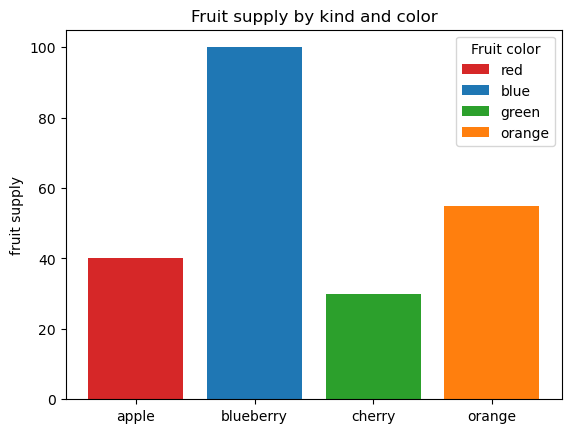

In [8]:
import matplotlib.pyplot as plt

# 创建一个图形和一个子图
fig, ax = plt.subplots()

# 定义水果种类
fruits = ['apple', 'blueberry', 'cherry', 'orange']
# 定义每种水果的数量
counts = [40, 100, 30, 55]
# 定义每种水果对应的标签颜色
bar_labels = ['red', 'blue', 'green', 'orange']
# 定义每种水果对应的条形颜色
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

# 绘制条形图
# x轴为水果种类，y轴为数量，条形颜色和标签分别为bar_colors和bar_labels
ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

# 设置y轴标签为“fruit supply”
ax.set_ylabel('fruit supply')
# 设置图表标题为“Fruit supply by kind and color”
ax.set_title('Fruit supply by kind and color')
# 添加图例，标题为“Fruit color”
ax.legend(title='Fruit color')

# 显示图表
plt.show()

上述代码画图展示了四种水果（苹果、蓝莓、樱桃和橙子）的供应数量。每种水果的条形颜色和标签分别设置为红色、蓝色、绿色和橙色

### 2.2.1 分组柱状图

**分组柱状图**（grouped bar chart），也称为**群组柱状图**，是一种用来展示不同类别之间多组数据对比的柱状图。它通过将每个类别的数据分成多组，并以并排的柱状条（柱）来显示这些数据的值，使得数据对比更加直观。

**主要特点：**
- **每个类别有多个柱子**：每个类别下的数据会分成多组并排列在一起，这些柱子通常是并排的，用来比较同一类别中的不同组别。
- **颜色或样式区分**：不同组别的数据柱通常通过颜色、纹理或样式进行区分，使得不同数据之间的对比更清晰。
- **多个数据维度**：分组柱状图适合展示多个维度的数据。例如，比较多个类别在不同时间段或条件下的数值。


**作用和用途**：
1. **多维数据对比** ：分组柱状图非常适合对比多组数据。比如，可以用于比较多个类别在不同年份或不同条件下的表现，清楚地展示它们的差异。

    示例：
    - 比较不同国家在不同年份的GDP。
    - 比较公司在不同市场中的销售额。
    - 比较学生在不同学科的成绩表现。

2. **直观展示数据变化**：通过将相关的数据分组并放在同一图表中，可以更直观地观察各组数据在不同类别中的表现和变化趋势。

3. **分组对比分析**：分组柱状图允许你在同一图中对比不同类别或组别的数据，这样可以在同一类别内部和类别之间同时进行分析。


下面是一个分组柱状图的示例代码：

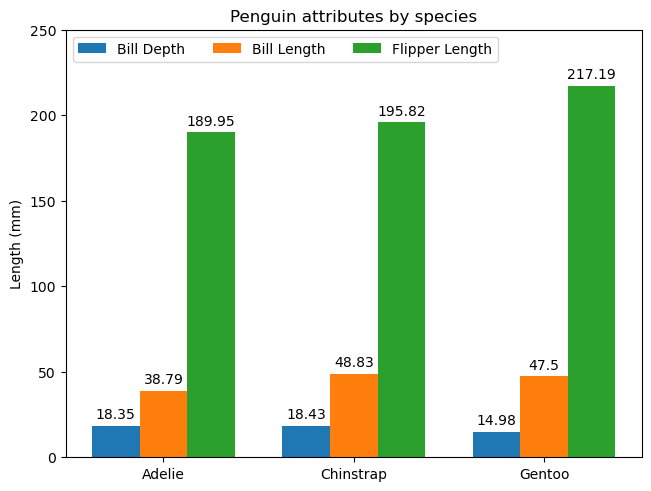

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 定义企鹅种类
species = ("Adelie", "Chinstrap", "Gentoo")
# 定义企鹅的各项平均值
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),  # 喙深度
    'Bill Length': (38.79, 48.83, 47.50),  # 喙长度
    'Flipper Length': (189.95, 195.82, 217.19),  # 翼长
}

# 创建一个数组，表示标签的位置
x = np.arange(len(species))  # 标签位置
# 定义柱状图的宽度
width = 0.25  # 柱子的宽度
# 初始化乘数，用于计算偏移量
multiplier = 0

# 创建一个图形和一个子图，并使用约束布局
fig, ax = plt.subplots(layout='constrained')

# 遍历企鹅的各项平均值
for attribute, measurement in penguin_means.items():
    # 计算偏移量
    offset = width * multiplier
    # 绘制柱状图
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # 为每个柱子添加标签
    ax.bar_label(rects, padding=3, label_type='edge')
    # 增加乘数
    multiplier += 1

# 添加y轴标签、标题和自定义x轴刻度标签等文本
ax.set_ylabel('Length (mm)')  # 设置y轴标签为“长度（毫米）”
ax.set_title('Penguin attributes by species')  # 设置图表标题为“企鹅属性按种类”
ax.set_xticks(x + width, species)  # 设置x轴刻度标签
ax.legend(loc='upper left', ncols=3)  # 添加图例，位置在左上角，列数为3
ax.set_ylim(0, 250)  # 设置y轴的范围

plt.show()

上述代码用于绘制**分组柱状图**，以展示三种企鹅（Adelie、Chinstrap、Gentoo）在三项属性（喙深度、喙长度和翼长）上的平均值。以下是对代码中关键函数的分析：
1. ax.bar(x + offset, measurement, width, label=attribute)

    作用：绘制柱状图。

    参数：
    - `x + offset`: 确定每组柱子的 X 轴位置。offset 用于将不同属性的柱子并排显示。
    - `measurement`: 对应每组柱子的 Y 轴数据值，例如每种企鹅的某个属性（如喙深度）的平均值。
    - `width`: 设置每个柱子的宽度。
    - `label=attribute`: 图例标签，表示当前柱子的属性（如 Bill Depth）。

    解释：这个函数绘制了一个柱状图，其中每组柱子表示不同属性的值。通过 x + offset 确保不同属性的数据柱在同一类别下并排显示。

2. ax.bar_label(rects, padding=3)

    作用：为柱子添加标签。

    参数：
    - `rects`: ax.bar() 返回的柱子对象，用于添加标签。
    - `padding=3`: 设置标签与柱子之间的距离。
    - `fmt='%.2f'`: 设置标签的格式，保留两位小数。
    - `label_type='edge'`: 设置标签的位置，'edge' 表示在柱子的边缘上显示。也可以设置为 'center' 表示在柱子中心显示。
    
    解释：这个函数在柱子上方添加数值标签，帮助读者直接查看每个柱子的具体数值。

### 2.2.2 堆叠柱状图

**堆叠柱状图**（stacked bar chart）是一种特殊的柱状图类型，其中每个类别下的柱子被进一步分为多个部分，这些部分堆叠在一起形成一个完整的柱子。每个部分代表不同的数据子集，并以不同的颜色或样式进行区分。这种图表不仅展示了每个类别的总量，还能显示不同子集的贡献。

**主要特点**：
1. **柱子分段**：每个柱子由多个部分组成，每个部分对应不同的子集数据（如不同组别、变量等）。
2. **分段堆叠**：这些部分堆叠在一起，使得每个类别的柱子代表了多个数据集的总量。
3. **颜色区分**：不同子集的部分通常通过颜色进行区分，便于识别每个部分的具体含义。

**作用和用途**：
1. **展示总量和子集贡献**：堆叠柱状图能够直观地展示每个类别的总量，同时清晰地显示每个子集在总量中所占的比例。例如，堆叠柱状图可以显示各个国家的总人口数，并且按照不同年龄段划分各个子集。

2. **对比不同类别的组成结构**：除了对比不同类别的总量外，堆叠柱状图也有助于比较各类别中不同子集的比例。例如，可以使用堆叠柱状图来比较不同公司产品销售额的组成情况（如不同地区的销售额贡献）。

3. **节省空间**：相对于分组柱状图，堆叠柱状图能够在同一条柱子中显示多维度的数据，减少了图表中的柱子数量，从而节省空间。

下面是一个堆叠柱状图的示例代码：

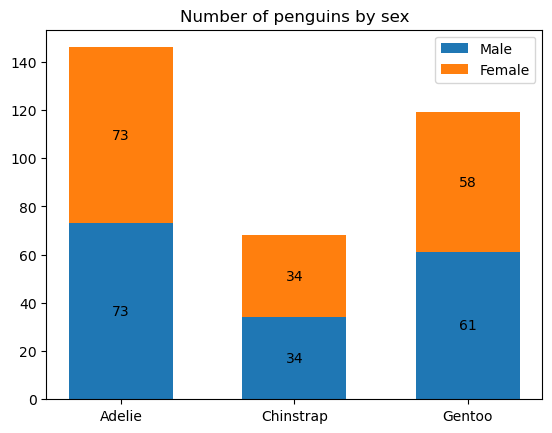

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 定义企鹅种类
species = ('Adelie', 'Chinstrap', 'Gentoo')
# 定义每种企鹅的性别数量
sex_counts = {
    'Male': np.array([73, 34, 61]),  # 雄性企鹅数量
    'Female': np.array([73, 34, 58]),  # 雌性企鹅数量
}
# 定义柱状图的宽度
width = 0.6  # 柱子的宽度：也可以是len(x)序列

# 创建一个图形和一个子图
fig, ax = plt.subplots()
# 初始化底部数组，用于堆叠柱状图
bottom = np.zeros(3)

# 遍历性别数量字典
for sex, sex_count in sex_counts.items():
    # 绘制堆叠柱状图
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    # 更新底部数组
    bottom += sex_count

    # 为每个柱子添加标签，标签类型为“center”
    ax.bar_label(p, label_type='center')

# 设置图表标题为“Number of penguins by sex”
ax.set_title('Number of penguins by sex')
# 添加图例
ax.legend()

plt.show()

这段代码使用 matplotlib 绘制了一个堆叠柱状图，展示了三种企鹅（Adelie, Chinstrap, Gentoo）中雄性和雌性的数量。以下是对关键函数和操作的分析：

1. `ax.bar(species, sex_count, width, label=sex, bottom=bottom)`

    **作用**：绘制堆叠柱状图。

    **参数**：
    - `species`: X 轴标签，代表三种企鹅。
    - `sex_count`: Y 轴数据，代表雄性或雌性企鹅的数量。
    - `width`: 柱状图的宽度，设置为 0.6。
    - `label=sex`: 用于图例的标签，代表当前性别（"Male" 或 "Female"）。
    - `bottom=bottom`: 堆叠柱状图的底部位置，起始为 0，逐步累加。

    **解释**：ax.bar() 用于绘制每个性别的柱子，并且通过 `bottom` 参数实现堆叠。随着每次循环，`bottom` 数组更新，确保不同性别的柱子正确堆叠在一起。

2. `bottom += sex_count`

    **作用**：更新底部数组，使得下一组数据在当前柱子的顶部进行堆叠。

    **解释**：通过每次将当前性别的数量加到 `bottom` 上，确保下一次绘制的性别柱子从前一个性别柱子的顶部开始堆叠。
3. `ax.bar_label(p, label_type='center')`

    **作用**：为柱子添加标签。
    
    **参数**：
    - `p`: 柱子的对象，即 `ax.bar()` 返回的结果。
    - `label_type='center'`: 标签位置设置为柱子中心，显示每个柱子的数值。

    **解释**：这个函数为每个堆叠的柱子部分添加数值标签，并将它们显示在柱子的中间位置，方便读者直观查看每部分的具体数值。


### 2.2.3 横向柱状图
**横向柱状图**（horizontal bar chart）是一种柱状图类型，其中柱子是水平排列的，而不是垂直的。也就是说，柱子的长度沿着X 轴扩展，而分类标签（类别）沿着Y 轴排列。

**主要特点**：
- **水平排列**：与传统柱状图（垂直柱状图）不同，横向柱状图的柱子从左向右水平排列。
- **X 轴表示数据值**：在横向柱状图中，柱子的长度表示数据的大小或频率，因此 X 轴代表的是数值或数据量。
- **Y 轴表示分类标签**：Y 轴显示不同的分类或项目，每个分类对应一根横向柱子。

**使用场景**：
横向柱状图通常用于以下场景：

- **分类标签较长**：当分类名称过长时，横向柱状图可以提供更好的可读性，因为较长的标签可以水平排列在 Y 轴上，而不会像垂直柱状图那样造成拥挤或重叠。
- **比较多个分类项的数值**：横向柱状图适合展示多个分类项的数值大小，并直观地进行比较。
- **空间限制**：在一些情境下，图表的垂直空间较小，横向柱状图可以更好地利用水平空间来显示更多的数据。

下面是一个横向柱状图的示例代码：

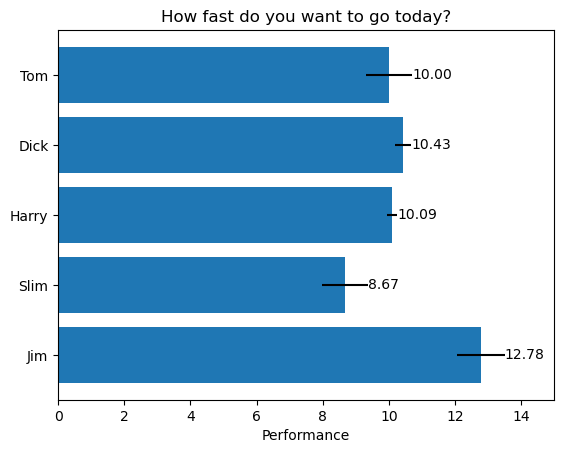

In [23]:
np.random.seed(19680801)
# 示例数据
# 定义人员名称
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
# 创建一个数组，表示人员的位置
y_pos = np.arange(len(people))
# 生成每个人的性能数据，范围在3到13之间
performance = 3 + 10 * np.random.rand(len(people))
# 生成每个人的误差数据
error = np.random.rand(len(people))

# 创建一个图形和一个子图
fig, ax = plt.subplots()

# 绘制水平柱状图
# y轴为人员位置，x轴为性能数据，误差为error，柱子对齐方式为居中
hbars = ax.barh(y_pos, performance, xerr=error, align='center')
# 设置y轴刻度标签为人员名称
ax.set_yticks(y_pos, labels=people)
# 反转y轴，使标签从上到下读取
ax.invert_yaxis()
# 设置x轴标签为“Performance”
ax.set_xlabel('Performance')
# 设置图表标题为“How fast do you want to go today?”
ax.set_title('How fast do you want to go today?')

# 使用特殊格式的浮点数为每个柱子添加标签
ax.bar_label(hbars, fmt='%.2f')
# 调整x轴的范围以适应标签
ax.set_xlim(right=15)
# 显示图表
plt.show()


这段代码通过 `matplotlib` 绘制了一个**水平柱状图**，展示了五个人的性能数据，并为每个柱子添加了误差条和标签。以下是对关键函数和操作的分析：

1. `ax.barh(y_pos, performance, xerr=error, align='center')`
- **作用**：绘制水平柱状图。
- **参数**：
    - `y_pos`: `Y` 轴位置（对应人员的位置）。
    - `performance`: `X` 轴数据，表示每个人的性能值。
    - `xerr=error`: 给柱子添加误差条，表示性能数据的不确定性范围。
    - `align='center'`: 柱子在 `Y` 轴上居中对齐。
- **解释**：`ax.barh()` 是绘制水平柱状图的函数，`X` 轴表示性能值，`Y` 轴表示不同的人。通过 `xerr` 参数为每个柱子添加误差条。

2. `ax.set_yticks(y_pos, labels=people)`
- **作用**：设置 `Y` 轴的刻度和对应标签。
- **参数**：
    - `y_pos`: `Y` 轴刻度的位置。
    - `labels=people`: `Y` 轴刻度对应的标签，表示人员名称。
- **解释**：为 Y 轴上的每个刻度位置设置标签，使得每个柱子能够与对应的人员名称对齐。

3. `ax.invert_yaxis()`
- **作用**：反转 Y 轴方向。
- **解释**：将 Y 轴标签的顺序反转，使得顶部显示第一个标签，底部显示最后一个标签。通常在水平柱状图中，默认顺序可能是从下往上，调用该函数后可以变成从上往下排列。

4. `ax.bar_label(hbars, fmt='%.2f')`
- **作用**：为每个柱子添加数值标签。
- **参数**：
    - `hbars`: `ax.barh()` 返回的柱子对象，用于标注每个柱子的数值。
    - `fmt='%.2f'`: 标签的格式，指定显示为带有两位小数的浮点数。

除了上述简单的水平柱状图，我们还可以通过调整参数和样式，绘制更加复杂和美观的水平柱状图。例如，可以设置柱子的颜色、宽度、透明度等，以及添加图例、标题等元素，使得图表更具吸引力和可读性。

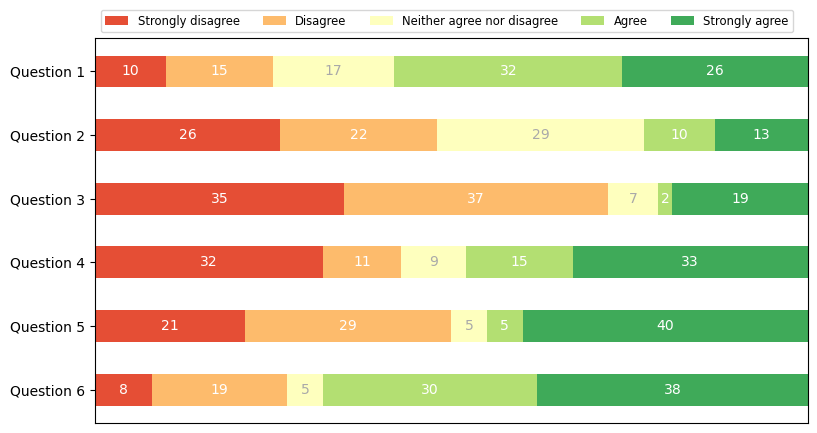

In [24]:
import matplotlib.pyplot as plt  # 导入matplotlib.pyplot模块用于绘图
import numpy as np  # 导入numpy模块用于数值计算

# 定义类别名称列表
category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']

# 定义每个问题的结果字典
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

# 定义一个函数用于绘制调查结果
def survey(results, category_names):
    """
    参数
    ----------
    results : dict
        一个从问题标签到每个类别答案列表的映射。
        假设所有列表包含相同数量的条目，并且
        它与*category_names*的长度匹配。
    category_names : list of str
        类别标签。
    """
    labels = list(results.keys())  # 获取问题标签列表
    data = np.array(list(results.values()))  # 将结果转换为numpy数组
    data_cum = data.cumsum(axis=1)  # 计算每个类别的累积和
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))  # 生成颜色映射

    fig, ax = plt.subplots(figsize=(9.2, 5))  # 创建一个图形和子图
    ax.invert_yaxis()  # 反转y轴
    ax.xaxis.set_visible(False)  # 隐藏x轴
    ax.set_xlim(0, np.sum(data, axis=1).max())  # 设置x轴的范围

    # 遍历每个类别并绘制水平条形图
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]  # 获取每个类别的宽度
        starts = data_cum[:, i] - widths  # 计算每个条形的起始位置
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)  # 绘制水平条形图

        r, g, b, _ = color  # 获取颜色的RGB值
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'  # 根据颜色选择文本颜色
        ax.bar_label(rects, label_type='center', color=text_color)  # 在条形图上添加标签
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')  # 添加图例

    return fig, ax  # 返回图形和子图对象

# 调用survey函数并显示图形
survey(results, category_names)
plt.show()

这段代码通过 matplotlib 绘制了一张堆叠条形图，展示了六个问题的调查结果，使用不同颜色表示每个问题的不同类别（如“强烈反对”、“同意”等）。以下是代码中重要函数的作用分析：

1. `plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.shape[1]))`
- **作用**：从预定义的颜色映射 `'RdYlGn'` 中生成颜色序列。
- **参数**：
    - `np.linspace(0.15, 0.85, data.shape[1])`: 生成一个 `0.15` 到 `0.85` 之间均匀分布的数字序列，长度为数据列数（即类别数）。
- **解释**：`plt.colormaps` 提供了颜色映射，`'RdYlGn'` 是一种红-黄-绿的渐变颜色映射，通过 `np.linspace` 控制颜色的渐变范围，使不同类别有不同的颜色。
2. `ax.invert_yaxis()`
- **作用**：反转 `Y` 轴方向。
- **解释**：通常，`Y` 轴标签从下到上排列，调用此函数后，`Y` 轴标签从上到下显示，使得问题顺序符合阅读习惯。
3. `ax.xaxis.set_visible(False)`
- **作用**：隐藏 `X` 轴。
- **解释**：在堆叠条形图中，`X` 轴的显示并不重要，隐藏它可以让图形更加简洁。
4. `ax.set_xlim(0, np.sum(data, axis=1).max())`
- **作用**：设置 `X` 轴的范围。
- **参数**：
    - `0`: `X` 轴的起点为 `0`。
    - `np.sum(data, axis=1).max()`: 计算每个问题的总和，选择最大的总和作为 `X` 轴的终点。
- **解释**：确保 `X` 轴的范围足够宽，能够容纳所有问题中最大的堆叠条形。
5. `ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)`
- **作用**：绘制水平堆叠条形图。
- **参数**：
    - `labels`: `Y` 轴上的问题标签。
    - `widths`: 当前类别的宽度（即每个问题在该类别的投票数量）。
    - `left=starts`: 每个条形的起始位置，控制条形堆叠。
    - `height=0.5`: 条形的高度，设置为 `0.5`。
    - `label=colname`: 每个条形的标签，用于图例。
    - `color=color`: 当前类别的颜色。
- **解释**：`ax.barh` 是绘制水平条形图的函数。通过设置 `left` 参数，可以实现条形堆叠，颜色和标签用来区分不同类别。
6. `ax.bar_label(rects, label_type='center', color=text_color)`
- **作用**：为每个条形添加居中的数值标签。
- **参数**：
    - `rects`: 当前条形的对象。
    - `label_type='center'`: 标签显示在条形的中心位置。
    - `color=text_color`: 标签的文本颜色，取决于条形的背景颜色。
- **解释**：`ax.bar_label` 为每个条形图上添加具体的数值，以便在图形中直观显示每个类别的数值。根据条形颜色选择白色或深灰色作为标签文本颜色，以确保标签可读性。
7. `ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')`
- **作用**：为图形添加图例。
- **参数**：
    - `ncols=len(category_names)`: 图例显示为一行，列数等于类别的数量。
    - `bbox_to_anchor=(0, 1)`: 图例位置锚定在图形的左上角。
    - `loc='lower left'`: 图例的起始位置为左下角。
    - `fontsize='small'`: 图例的字体大小设置为较小。
- **解释**：图例帮助观众理解不同颜色对应的类别，位置和大小进行了自定义以适应图形布局。


## 2.3 散点图

**散点图**（scatter plot）是一种通过点的分布来展示两个变量之间关系的图表。它将数据点绘制在二维坐标系上，通常使用 X 轴 和 Y 轴 分别表示两个不同的变量。每个点的坐标代表一对变量的取值，因此通过观察这些点的分布，能够直观地发现变量之间的关系。

**散点图的特点**：
- **数据点分布**：每个点表示一对数据的 X 和 Y 值。
- **观察变量关系**：散点图特别适合用于判断两个变量之间是否存在相关关系，如正相关、负相关或无关。
- **点的密集度**：数据点的密集程度可以显示趋势，比如聚集或分散。较密集的区域显示该范围的数据更集中。
- **趋势线（可选）**：可以在散点图上添加趋势线（如线性回归线）来表示两个变量之间的趋势关系。
- **多变量扩展**：有时，散点图会用不同颜色或形状的点来表示第三个变量的类别，或使用点的大小来表示额外的数值信息。

**使用场景**：
- **关联性分析**：判断两个变量之间是否存在线性或非线性关系。
- **异常点检测**：识别可能偏离正常范围的异常点。
- **数据分布**：展示数据在二维空间中的分布特征。

**散点图的典型关系**：
- **正相关**：当 X 轴的值增加时，Y 轴的值也增加。
- **负相关**：当 X 轴的值增加时，Y 轴的值减少。
- **无关**：数据点在图上没有明显的线性趋势。

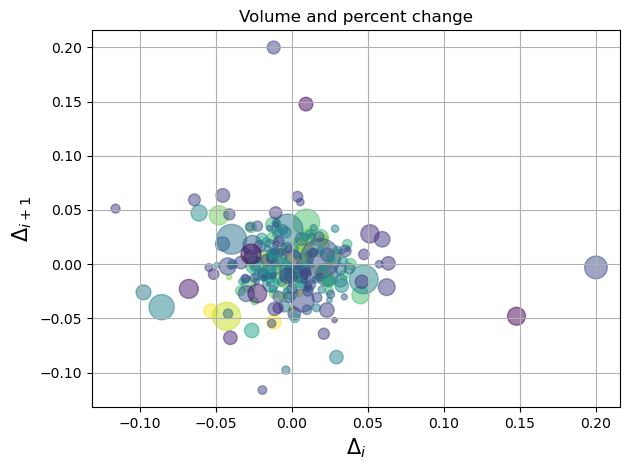

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# 从mpl-data/sample_data目录加载一个包含日期、开盘价、最高价、最低价、收盘价、成交量、调整后收盘价字段的yahoo csv数据的numpy记录数组。
# 记录数组将日期存储为单位为天（'D'）的np.datetime64。
price_data = cbook.get_sample_data('goog.npz')['price_data']  # 获取示例数据中的价格数据
price_data = price_data[-250:]  # 获取最近250个交易日的数据

delta1 = np.diff(price_data["adj_close"]) / price_data["adj_close"][:-1]  # 计算调整后收盘价的变化率

# 标记大小以点的平方为单位
volume = (15 * price_data["volume"][:-2] / price_data["volume"][0])**2  # 计算成交量的标记大小
close = 0.003 * price_data["close"][:-2] / 0.003 * price_data["open"][:-2]  # 计算收盘价与开盘价的比率

fig, ax = plt.subplots()  # 创建一个图形和一个子图
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)  # 绘制散点图，x轴为前一天的变化率，y轴为当天的变化率，颜色为收盘价与开盘价的比率，大小为成交量

ax.set_xlabel(r'$\Delta_i$', fontsize=15)  # 设置x轴标签
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)  # 设置y轴标签
ax.set_title('Volume and percent change')  # 设置图形标题

ax.grid(True)  # 启用网格
fig.tight_layout()  # 自动调整子图参数以适应图形区域


plt.show()

这段代码使用了 matplotlib 和 numpy 模块来绘制一个基于股票价格变化和成交量的散点图。

主要使用了 `ax.scatter()` 函数来绘制散点图，其中：
- `x=delta1[:-1]`：横坐标为前一天的变化率。
- `y=delta1[1:]`：纵坐标为当天的变化率。
- `c=close`：使用开盘价和收盘价的比率为颜色。
- `s=volume`：使用成交量决定点的大小。
- `alpha=0.5`：设置点的透明度，0.5 表示半透明。

完整参数列表如下：
scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None)

参数详细解释：

1. **x**:
   - 类型: 数组或列表
   - 描述: 点在 x 轴的坐标值。

2. **y**:
   - 类型: 数组或列表
   - 描述: 点在 y 轴的坐标值。

3. **s**:
   - 类型: 数值、数组或列表
   - 描述: 点的大小。可以是单个值或一个数组，数组表示每个点的大小。
   - 默认值: 20

4. **c**:
   - 类型: 数值、数组或颜色值
   - 描述: 点的颜色。可以是单一颜色值，也可以是数值数组（结合 `cmap` 使用）。

5. **marker**:
   - 类型: 字符串
   - 描述: 点的形状，比如 `'o'` 为圆形，`'^'` 为上三角形等。
   - 默认值: `'o'`（圆形）

6. **cmap**:
   - 类型: Colormap 对象或字符串
   - 描述: 当 `c` 是数值时，指定颜色映射方式。

7. **norm**:
   - 类型: Normalize 实例
   - 描述: 用于将 `c` 的数值归一化到 [0, 1] 范围内。

8. **vmin** 和 **vmax**:
   - 类型: 数值
   - 描述: 映射 `c` 的最小值和最大值，控制颜色映射的范围。

9. **alpha**:
   - 类型: 浮点数
   - 描述: 点的透明度，范围在 [0, 1] 之间，0 为完全透明，1 为完全不透明。

10. **linewidths**:
    - 类型: 数值、数组或列表
    - 描述: 设置点的边框宽度。

11. **edgecolors**:
    - 类型: 颜色字符串或数组
    - 描述: 设置点的边框颜色，默认值为 `None` 或 `'face'`（与点的填充颜色相同）。
